## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** - is prediction target
* **bedroomsNumber** - of Bedrooms/House
* **bathroomsNumber** - of bathrooms/bedrooms
* **sqft_livingsquare** - footage of the home
* **sqft_lotsquare** - footage of the lot
* **floorsTotal** - floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline
import warnings
warnings.filterwarnings(action= 'ignore', category= UserWarning)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
import statsmodels.formula as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels
from sklearn.metrics import r2_score


In [3]:
df = pd.read_csv('data/kc_house_data.csv')
pd.set_option('display.max_columns',None)
print(df.shape)
df.head()


(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Change dates to datetime

In [4]:
def to_datetime(df):
    df['date'] = pd.to_datetime(df.date)
    return df

df = to_datetime(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [6]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


### Deal with null values

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [9]:
missing_value_df

,column_name,percent_missing
id,id,0.000000
date,date,0.000000
price,price,0.000000
bedrooms,bedrooms,0.000000
bathrooms,bathrooms,0.000000
sqft_living,sqft_living,0.000000
sqft_lot,sqft_lot,0.000000
floors,floors,0.000000
waterfront,waterfront,11.001528
view,view,0.291707


In [10]:
df.waterfront.value_counts(normalize=True)

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

In [11]:
# Fill waterfront, view and yr_renovated nulls with a 0
df = df.fillna(0)

In [12]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [13]:
for col in df.columns:
    print(col)
    print(df[col].value_counts(normalize = True, ascending=False).head(5))
    print("-------------------------------------------------------------")

id
795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64
-------------------------------------------------------------
date
2014-06-23    0.006575
2014-06-25    0.006066
2014-06-26    0.006066
2014-07-08    0.005880
2015-04-27    0.005834
Name: date, dtype: float64
-------------------------------------------------------------
price
350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64
-------------------------------------------------------------
bedrooms
3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64
-------------------------------------------------------------
bathrooms
2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64
-------------------------------------------------------------
sqft_living
1300    0.00

We see that **sqft_basement** has some **?** values.  These need to be changed.  Nearly 60% of the data
has a value of 0 for **sqft_basement** so we will make these values 0

In [14]:
df['sqft_basement'] = df.sqft_basement.replace(to_replace='?', value = 0.0)

In [15]:
df['sqft_basement'].value_counts()

0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
2570.0        1
1245.0        1
3480.0        1
2240.0        1
1481.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [16]:
df['sqft_basement'] = df['sqft_basement'].astype('float')

### Deal with outliers

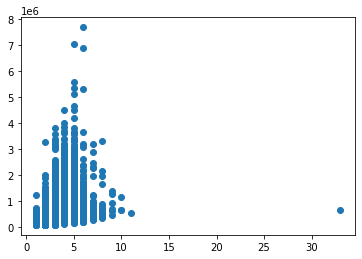

In [17]:
plt.scatter(df.bedrooms,df.price)

In [18]:
#We have an outlier in bedroom number that needs to be dropped
df.sort_values(by='bedrooms', ascending=False).head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
8748,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,627300145,2014-08-14,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400


In [19]:
# 33 bedroom house has been dropped
df = df.drop(index=15856, axis=0)

In [20]:
# Drop the houses priced over 1.2 million... because there aren't many
df = df[df['price'] < 900000]

<AxesSubplot:>

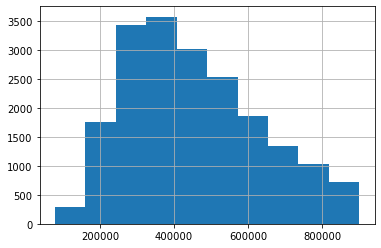

In [21]:
df.price.hist()

In [22]:
len(df[df['price']<900000])

19523

/Users/riptonrosen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

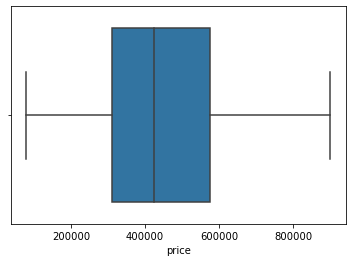

In [23]:
sns.boxplot(df['price'])

/Users/riptonrosen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

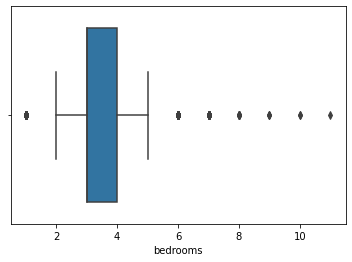

In [24]:
sns.boxplot(df['bedrooms'])

In [25]:
for i in range(85, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['price'].quantile(q=q)))

0.85 percentile: 663850.0000000003
0.86 percentile: 675000.0
0.87 percentile: 685000.0
0.88 percentile: 699950.0
0.89 percentile: 710000.0
0.9 percentile: 724739.9999999998
0.91 percentile: 735000.0
0.92 percentile: 750000.0
0.93 percentile: 762500.0
0.94 percentile: 779000.0
0.95 percentile: 795000.0
0.96 percentile: 810000.0
0.97 percentile: 830000.0
0.98 percentile: 850000.0


### Look for duplicates

There are 177 id duplicates, probably due to houses being sold twice.  The model will treat them as different data points, still

In [26]:
len(df[df.duplicated(subset='id')])

167

Define columns

In [27]:
cols = ['sqft_living', 'sqft_lot', 'waterfront', 'view', 'bedrooms', 'bathrooms', 'zipcode', 'sqft_living15',\
        'sqft_lot15', 'price']

### Create heatmap to see where there's a high enough correlation to drop a column

<AxesSubplot:>

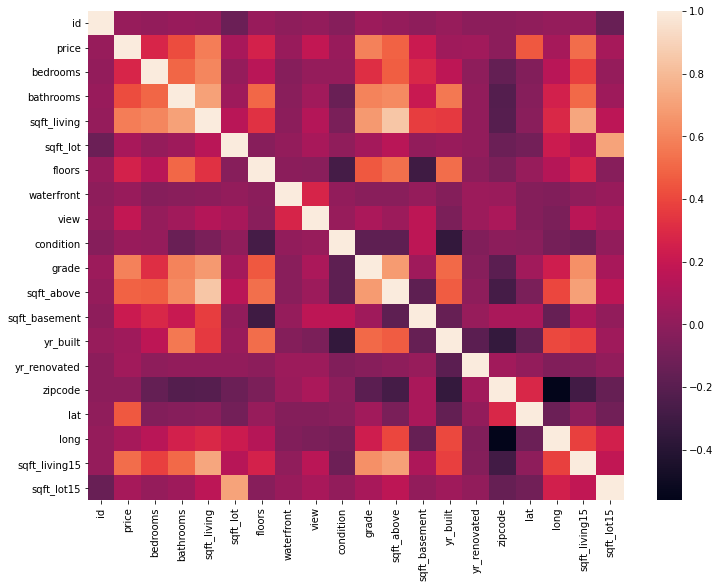

In [28]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr())

Sqft_above and sqft_living have a high enough correlation that we can drop one.  Sqft_above has been chosen.

## Create a covariance matrix

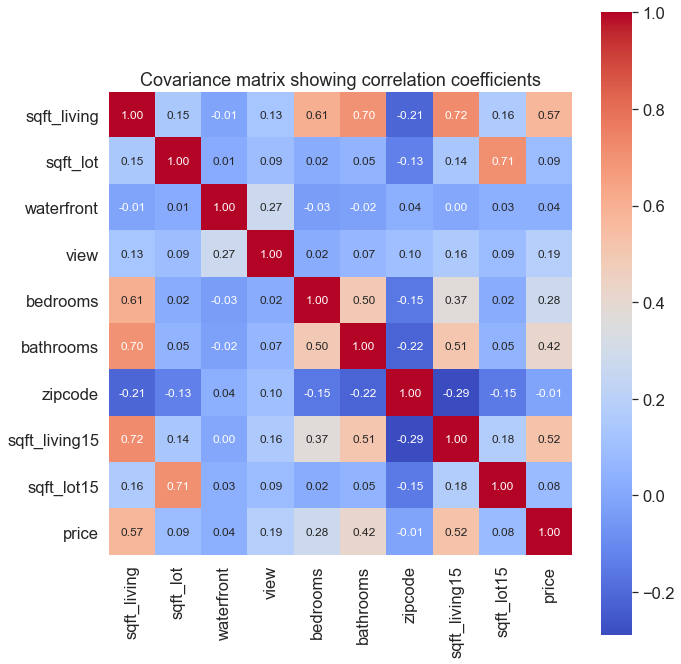

In [29]:

stdsc = StandardScaler() 
X_std = stdsc.fit_transform(df[cols].values)
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

In [30]:
df.drop(columns = 'sqft_above',inplace = True)

In [31]:
df.sort_values(by='price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15874,3754500010,2014-06-16,899950.0,4,3.50,3290,5414,2.0,0.0,1.0,3,9,930.0,2006,0.0,98034,47.7074,-122.219,1820,9609
20113,3885802135,2014-06-10,899900.0,4,2.50,2580,3909,2.0,0.0,0.0,3,8,0.0,2013,0.0,98033,47.6852,-122.210,1820,5772
4297,5452800495,2015-04-22,899100.0,5,2.50,2410,15300,1.0,0.0,0.0,4,8,1010.0,1975,0.0,98040,47.5416,-122.231,2440,15300
12782,8691330330,2015-04-09,899000.0,4,2.50,4080,10295,2.0,0.0,0.0,3,10,0.0,1998,0.0,98075,47.5933,-121.982,3470,10295
5846,4070700290,2015-02-26,899000.0,3,2.50,1950,3730,2.0,0.0,0.0,3,9,0.0,1996,0.0,98033,47.6731,-122.199,2080,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,2014-05-08,82500.0,2,1.00,520,22334,1.0,0.0,0.0,2,5,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570
8267,3883800011,2014-11-05,82000.0,3,1.00,860,10426,1.0,0.0,0.0,3,6,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250
16184,3028200080,2015-03-24,81000.0,2,1.00,730,9975,1.0,0.0,0.0,1,5,0.0,1943,0.0,98168,47.4808,-122.315,860,9000
465,8658300340,2014-05-23,80000.0,1,0.75,430,5050,1.0,0.0,0.0,2,4,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500


In [32]:
df.reset_index(inplace=True)

## Feature engineering -- differentiate categoricals and continuous variables

In [33]:
df.nunique()

index            19523
id               19356
date               370
price             3249
bedrooms            11
bathrooms           23
sqft_living        848
sqft_lot          8891
floors               6
waterfront           2
view                 5
condition            5
grade               10
sqft_basement      259
yr_built           116
yr_renovated        69
zipcode             70
lat               4994
long               748
sqft_living15      684
sqft_lot15        7873
dtype: int64

We can see which columns are categorical and which are continuous variables based on how many unique values they have.
Categorical variables are generally subjective and have less unique values.

In [34]:
cont = []
cat = []


for col in df.columns:
    if (df[col].nunique() < 25):
        cat.append(col)
    else:
        cont.append(col)

In [35]:
cont

['index',
 'id',
 'date',
 'price',
 'sqft_living',
 'sqft_lot',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [36]:
cat

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

# One-hot encoding

In [37]:
dummies = pd.get_dummies(df[cat].astype('category'), drop_first=True)

kc_preprocessed = df.drop(cat, axis = 1)
kc_preprocessed = pd.concat([kc_preprocessed, dummies], axis=1)
kc_preprocessed.head()

,index,id,date,price,sqft_living,sqft_lot,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.75,bathrooms_6.75,bathrooms_7.5,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,0,7129300520,2014-10-13,221900.0,1180,5650,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,1,6414100192,2014-12-09,538000.0,2570,7242,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,2,5631500400,2015-02-25,180000.0,770,10000,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,3,2487200875,2014-12-09,604000.0,1960,5000,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,4,1954400510,2015-02-18,510000.0,1680,8080,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


### Create a pairplot in order to check correlation with the predictor variables

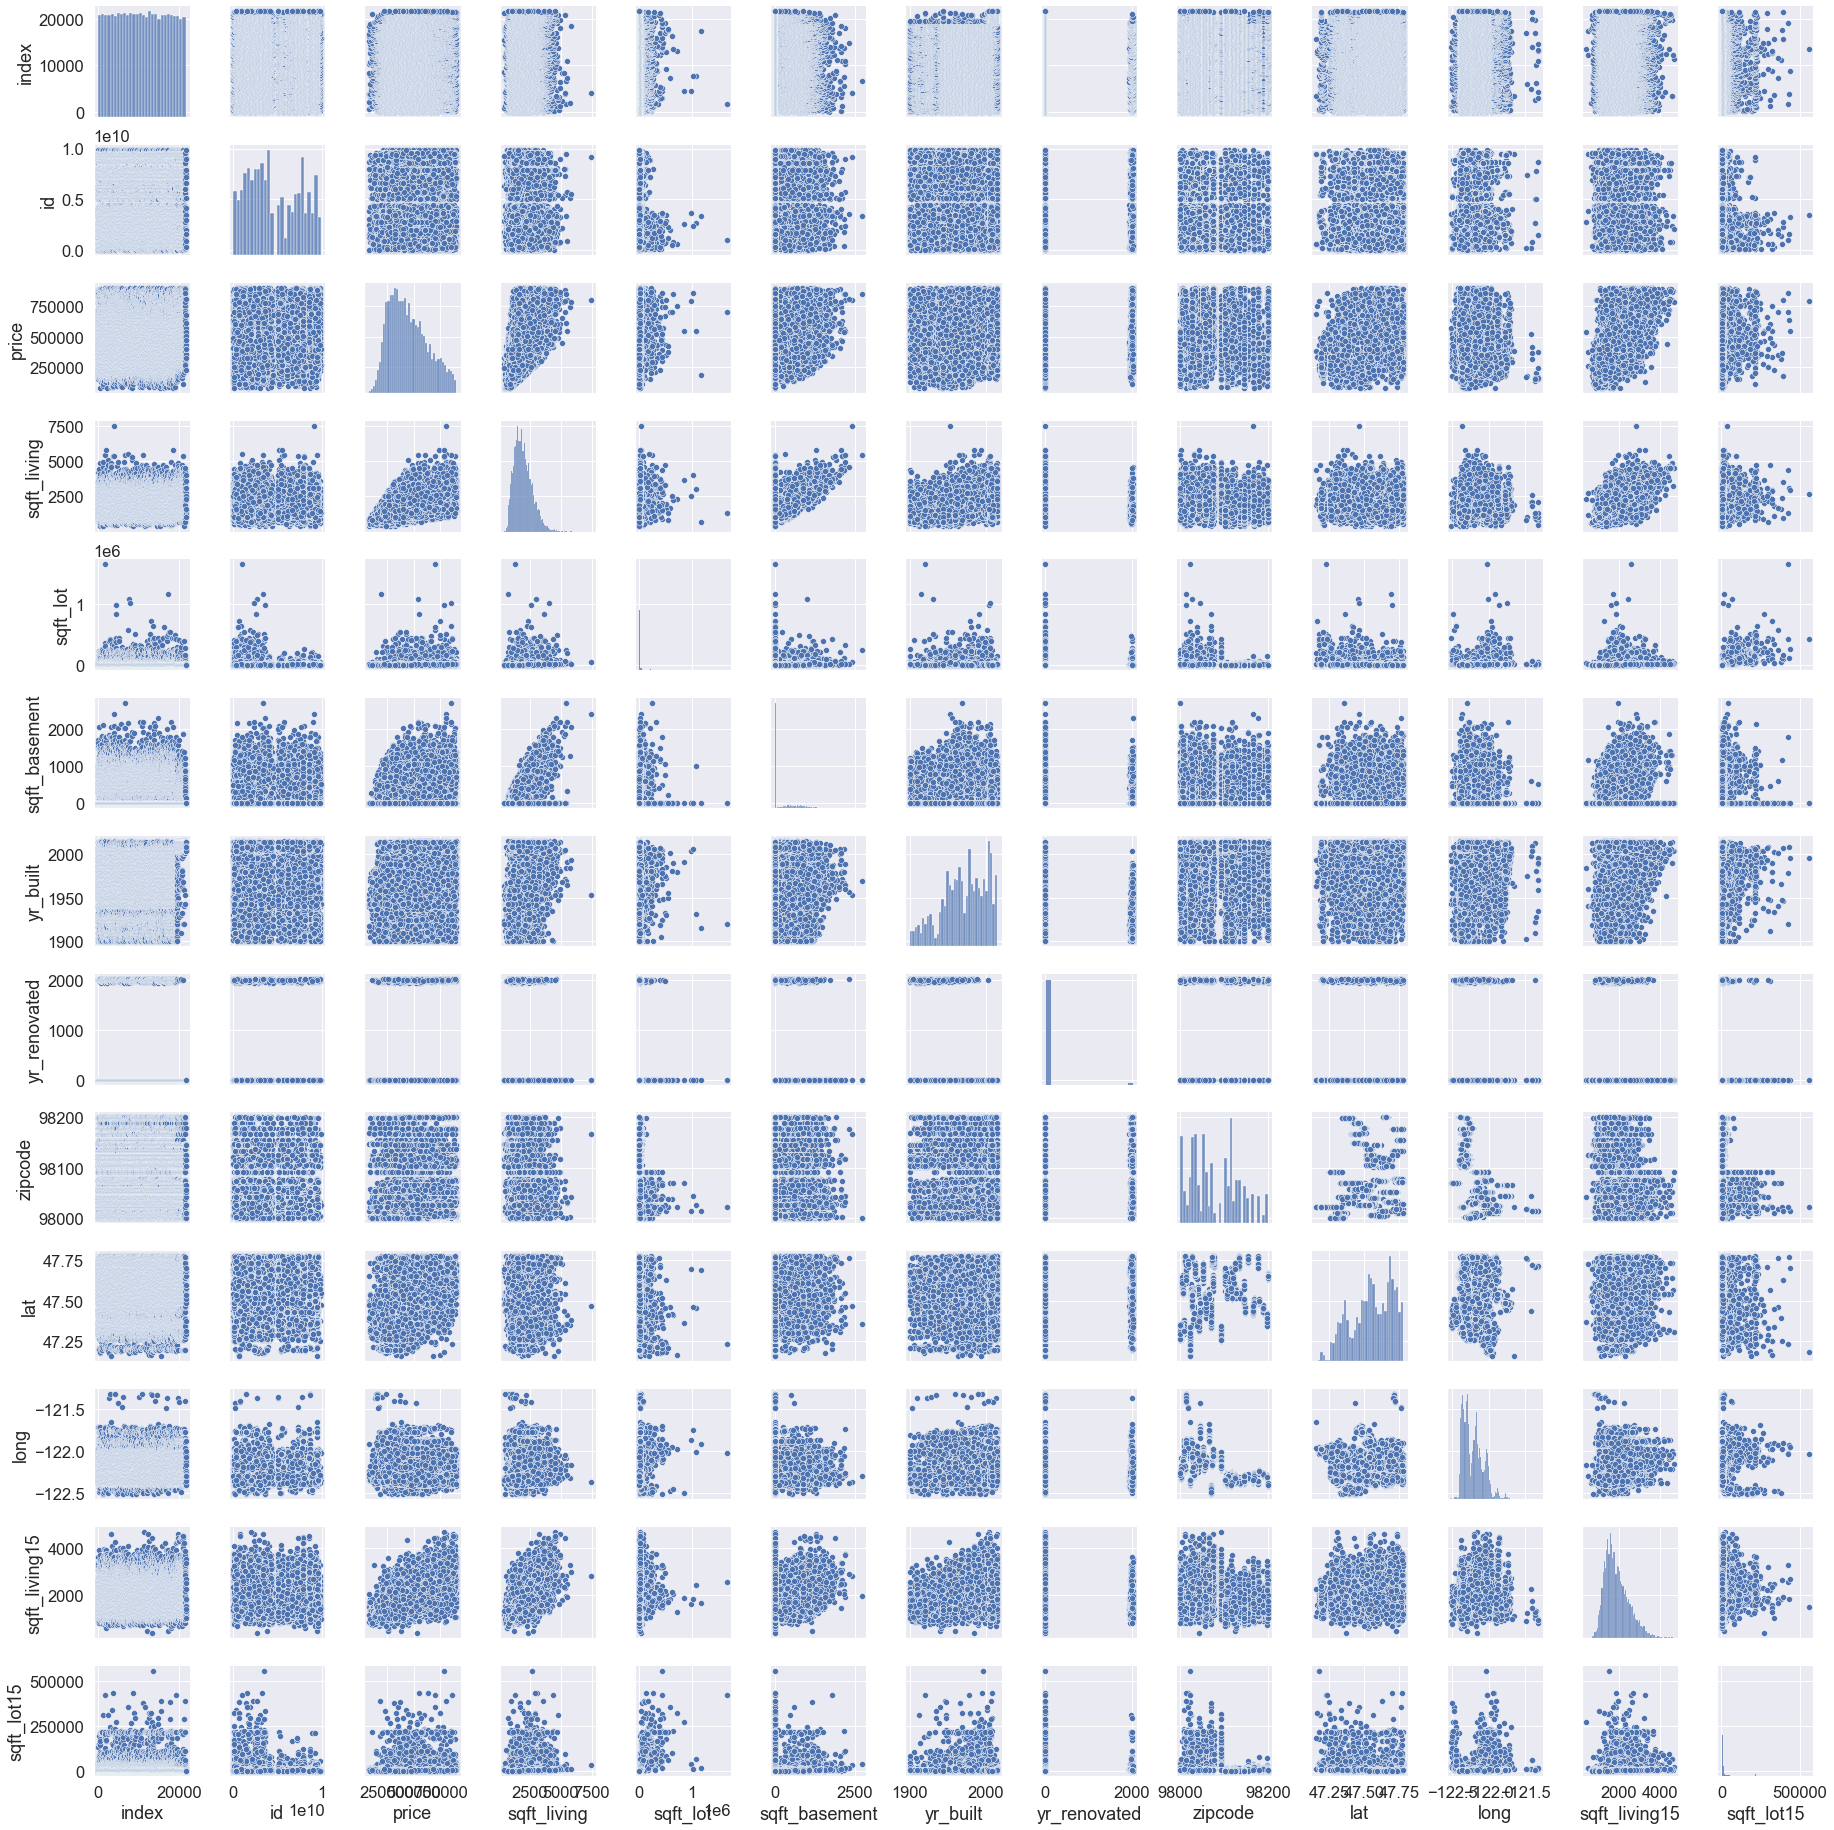

In [38]:
sns.pairplot(df[cont], size=2.0)

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>],
       [<AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

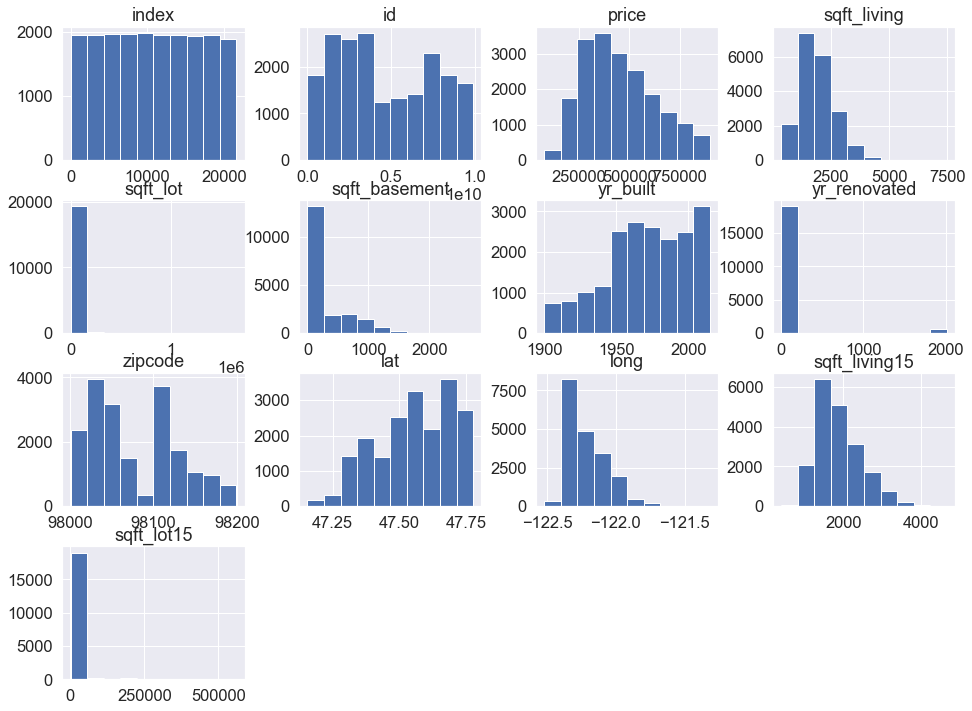

In [39]:
df[cont].hist(figsize=(16,12))

# Kings County Map

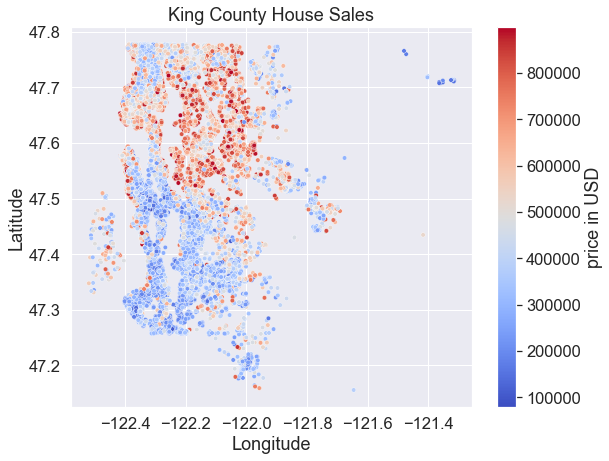

In [40]:
plt.figure(figsize = (9,7))
ax = sns.scatterplot(x = df['long'], y = df['lat'], hue = df['price'],
                palette = 'coolwarm',s=20, legend = None, data = df)

norm = plt.Normalize(df['price'].min(), df['price'].max())
smap = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'price in USD')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('King County House Sales')
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19523 entries, 0 to 19522
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          19523 non-null  int64         
 1   id             19523 non-null  int64         
 2   date           19523 non-null  datetime64[ns]
 3   price          19523 non-null  float64       
 4   bedrooms       19523 non-null  int64         
 5   bathrooms      19523 non-null  float64       
 6   sqft_living    19523 non-null  int64         
 7   sqft_lot       19523 non-null  int64         
 8   floors         19523 non-null  float64       
 9   waterfront     19523 non-null  float64       
 10  view           19523 non-null  float64       
 11  condition      19523 non-null  int64         
 12  grade          19523 non-null  int64         
 13  sqft_basement  19523 non-null  float64       
 14  yr_built       19523 non-null  int64         
 15  yr_renovated   1952

# Model 1, just the normal data

In [42]:
outcome = 'price'
x_cols = df.drop(['price', 'date', 'id', 'zipcode', 'sqft_lot15', 'index'], axis = 1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

In [43]:
model_1 = ols(formula= f, data = df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     2666.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:22:46   Log-Likelihood:            -2.5303e+05
No. Observations:               19523   AIC:                         5.061e+05
Df Residuals:                   19507   BIC:                         5.062e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.038e+07   8.38e+05    -24.312      0.000    -2.2e+07   -1.87e+07
bedrooms      -8264.2210   1103.242     -7.491      0.000   -1.04e+04   -6101.772
bathrooms      2.267e+04   1833.405     12.364      0.000    1.91e+04    2.63e+04
sqft_living      61.5595      2.265     27.178      0.000      57.120      65.999
sqft_lot          0.1919      0.020      9.589      0.000       0.153       0.231
floors         2.987e+04   1975.697     15.120      0.000     2.6e+04    3.37e+04
waterfront     1.206e+05    1.7e+04      7.101      0.000    8.73e+04    1.54e+05
view            2.34e+04   1361.119     17.188      0.000    2.07e+04    2.61e+04
condition      2.525e+04   1257.193     20.083      0.000    2.28e+04    2.77e+04
grade          6.507e+04   1223.551     53.182      0.000    6.27e+04    6.75e+04
sqft_basement     0.7677      2.555      0.300      0.764      -4.240       5.776
yr_built      -1555.9713     40.029    -38.871      0.000   -1634.432   -1477.511
yr_renovated     10.7824      2.323      4.642      0.000       6.229      15.336
lat            5.125e+05   5469.763     93.701      0.000    5.02e+05    5.23e+05
long           1.077e+04   6285.152      1.714      0.087   -1546.880    2.31e+04
sqft_living15    47.1048      2.067     22.787      0.000      43.053      51.157
==============================================================================
Omnibus:                      790.310   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1090.368
Skew:                           0.410   Prob(JB):                    1.70e-237
Kurtosis:                       3.818   Cond. No.                     4.68e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train MSE: 10644518720.951574
Test MSE: 10279413443.598602
RMSE Train: 103172.27690107249
RMSE Test: 101387.4422381717


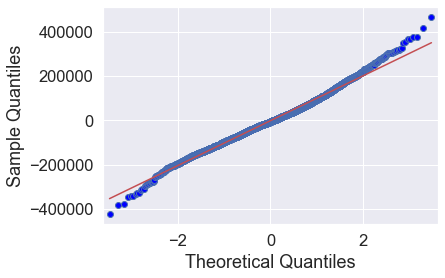

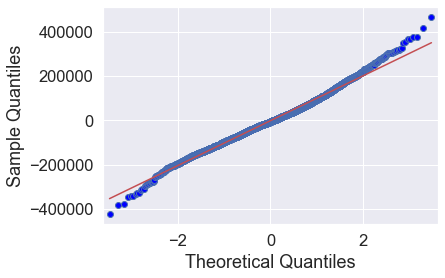

In [44]:
data = df.copy()

y = data['price']
X = data.drop(['price', 'date', 'id', 'zipcode'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

len(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

r2_score(y_test, y_hat_test)

residuals = (y_test - y_hat_test)

statsmodels.graphics.gofplots.qqplot(residuals, line = "r")

# Model 2, with standardized data

## Create a function to standardize the continuous variables, and store them in a new DataFrame: **kc_standardized**

In [45]:
to_stan = []
not_to_stan = []


for col in df.columns:
    if col == 'waterfront' or col == 'view' or col == 'long':
        not_to_stan.append(col)
    else:
        to_stan.append(col)

In [46]:
def standardize(feature):
    return (feature-feature.mean())/feature.std()

/Users/riptonrosen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

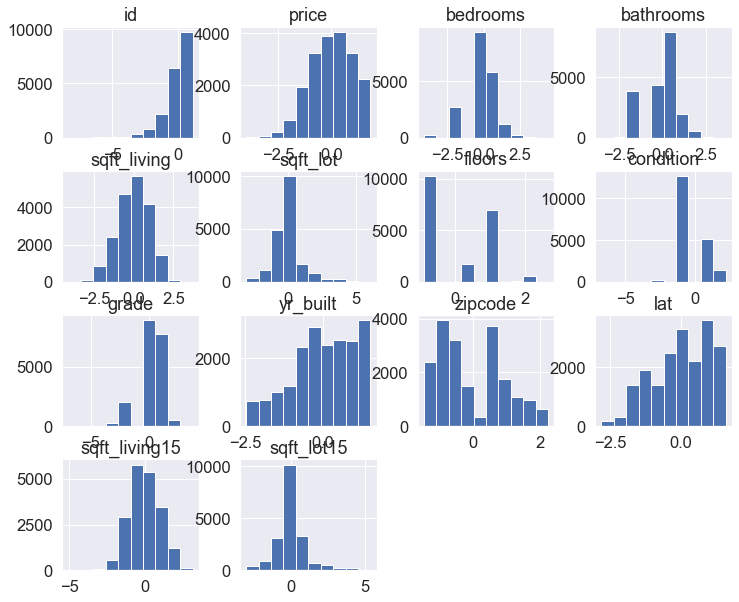

In [47]:
stand_cont_df = df[to_stan]
stand_cont_df.drop(columns = ['sqft_basement','date', 'index', 'yr_renovated'], inplace=True)

cont_log = np.log(stand_cont_df)
kc_standardized = cont_log.apply(standardize)
kc_standardized.hist(figsize=(12,10))

In [48]:
kc_standardized.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,sqft_living15,sqft_lot15
id,1.000000,0.019607,0.010033,0.023845,0.010667,-0.134241,0.020265,-0.012046,0.034821,0.020801,-0.006457,0.000320,0.002638,-0.129814
price,0.019607,1.000000,0.278933,0.430160,0.566980,0.054296,0.282356,0.036833,0.583910,0.079844,-0.003434,0.492417,0.511443,0.042450
bedrooms,0.010033,0.278933,1.000000,0.507308,0.646201,0.178169,0.184500,0.033133,0.351514,0.203776,-0.177977,-0.061067,0.397934,0.158221
bathrooms,0.023845,0.430160,0.507308,1.000000,0.727670,0.025875,0.496171,-0.111546,0.607611,0.569516,-0.234691,-0.034258,0.526460,0.024007
sqft_living,0.010667,0.566980,0.646201,0.727670,1.000000,0.285229,0.359697,-0.048406,0.672940,0.374031,-0.227628,-0.022475,0.707960,0.263542
sqft_lot,-0.134241,0.054296,0.178169,0.025875,0.285229,1.000000,-0.258963,0.085816,0.083973,-0.039743,-0.270903,-0.177604,0.331098,0.919820
floors,0.020265,0.282356,0.184500,0.496171,0.359697,-0.258963,1.000000,-0.265459,0.456601,0.502581,-0.080902,0.013321,0.274824,-0.246991
condition,-0.012046,0.036833,0.033133,-0.111546,-0.048406,0.085816,-0.265459,1.000000,-0.152212,-0.325049,-0.014710,-0.021118,-0.107731,0.094268
grade,0.034821,0.583910,0.351514,0.607611,0.672940,0.083973,0.456601,-0.152212,1.000000,0.514157,-0.187675,0.066400,0.617456,0.091212
yr_built,0.020801,0.079844,0.203776,0.569516,0.374031,-0.039743,0.502581,-0.325049,0.514157,1.000000,-0.344358,-0.161264,0.366668,-0.013159


In [49]:
kc_standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19523 entries, 0 to 19522
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19523 non-null  float64
 1   price          19523 non-null  float64
 2   bedrooms       19523 non-null  float64
 3   bathrooms      19523 non-null  float64
 4   sqft_living    19523 non-null  float64
 5   sqft_lot       19523 non-null  float64
 6   floors         19523 non-null  float64
 7   condition      19523 non-null  float64
 8   grade          19523 non-null  float64
 9   yr_built       19523 non-null  float64
 10  zipcode        19523 non-null  float64
 11  lat            19523 non-null  float64
 12  sqft_living15  19523 non-null  float64
 13  sqft_lot15     19523 non-null  float64
dtypes: float64(14)
memory usage: 2.1 MB


In [50]:
outcome = 'price'
x_cols = kc_standardized.drop(['price', 'id', 'zipcode', 'sqft_lot15'], axis = 1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

In [51]:
model_2 = ols(formula= f, data = kc_standardized).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     4153.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:22:47   Log-Likelihood:                -16567.
No. Observations:               19523   AIC:                         3.316e+04
Df Residuals:                   19512   BIC:                         3.324e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       8.57e-12      0.004   2.12e-09      1.000      -0.008       0.008
bedrooms         -0.0752      0.005    -13.840      0.000      -0.086      -0.065
bathrooms         0.0897      0.007     12.813      0.000       0.076       0.103
sqft_living       0.2875      0.009     33.152      0.000       0.270       0.304
sqft_lot         -0.0183      0.005     -3.734      0.000      -0.028      -0.009
floors            0.0848      0.005     15.879      0.000       0.074       0.095
condition         0.0870      0.004     19.858      0.000       0.078       0.096
grade             0.3270      0.006     51.544      0.000       0.315       0.339
yr_built         -0.2390      0.006    -41.586      0.000      -0.250      -0.228
lat               0.4355      0.004    101.637      0.000       0.427       0.444
sqft_living15     0.1708      0.006     27.583      0.000       0.159       0.183
==============================================================================
Omnibus:                      348.945   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              694.257
Skew:                          -0.070   Prob(JB):                    1.75e-151
Kurtosis:                       3.913   Cond. No.                         5.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Train MSE: 0.31969843065582804
Test MSE: 0.31569579596731456
RMSE Train: 0.5654188099593327
RMSE Test: 0.5618681304072287


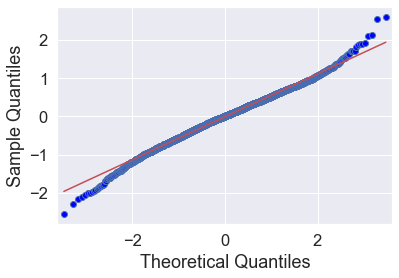

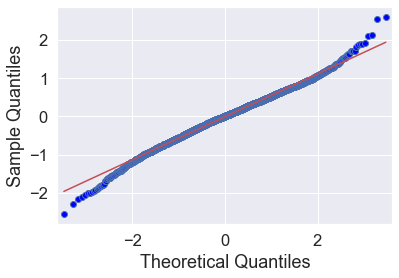

In [52]:
data = kc_standardized.copy()

y = data['price']
X = data.drop(['price', 'id', 'zipcode'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

len(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

r2_score(y_test, y_hat_test)

residuals = (y_test - y_hat_test)

statsmodels.graphics.gofplots.qqplot(residuals, line = "r")

# Model 3, log transformation

array([[<AxesSubplot:title={'center':'logPrice'}>,
        <AxesSubplot:title={'center':'logSqrLiv'}>],
       [<AxesSubplot:title={'center':'logSqLot'}>,
        <AxesSubplot:title={'center':'logSq15'}>],
       [<AxesSubplot:title={'center':'logBed'}>,
        <AxesSubplot:title={'center':'logBath'}>]], dtype=object)

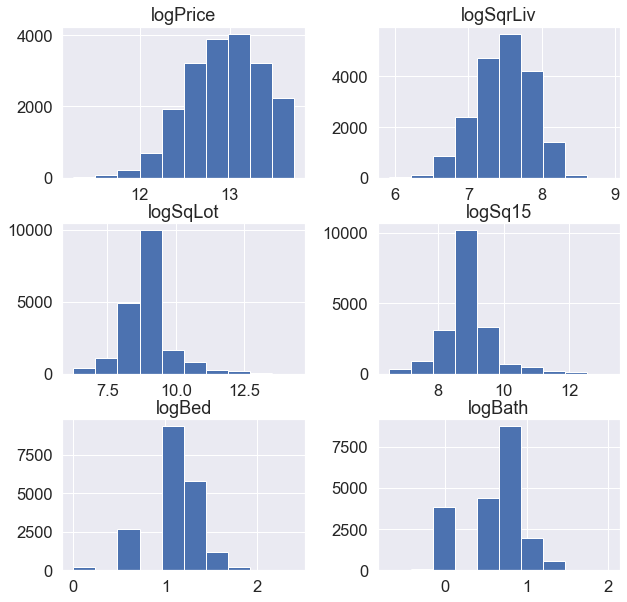

In [70]:
kc_log = pd.DataFrame([])
kc_log['logPrice']=np.log(df['price'])
kc_log['logSqrLiv']=np.log(df['sqft_living'])
kc_log['logSqLot']=np.log(df['sqft_lot'])
kc_log['logSq15']=np.log(df['sqft_lot15'])
kc_log['logBed']=np.log(df['bedrooms'])
kc_log['logBath']=np.log(df['bathrooms'])

kc_log.hist(figsize=[10,10])

In [71]:
outcome = 'logPrice'
x_cols = kc_log.drop(columns='logPrice')
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

In [72]:
model_3 = ols(formula= f, data = kc_log).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPrice   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     2083.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:49:51   Log-Likelihood:                -6476.1
No. Observations:               19523   AIC:                         1.296e+04
Df Residuals:                   19517   BIC:                         1.301e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0889      0.069    116.736      0.000       7.953       8.225
logSqrLiv      0.7544      0.011     68.481      0.000       0.733       0.776
logSqLot      -0.0293      0.007     -4.175      0.000      -0.043      -0.016
logSq15       -0.0309      0.008     -4.046      0.000      -0.046      -0.016
logBed        -0.2264      0.011    -20.052      0.000      -0.249      -0.204
logBath        0.0045      0.010      0.461      0.645      -0.015       0.023
==============================================================================
Omnibus:                      325.026   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.125
Skew:                          -0.182   Prob(JB):                     9.75e-54
Kurtosis:                       2.591   Cond. No.                         432.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Train MSE: 0.11382540061156424
Test MSE: 0.11315010259683331
RMSE Train: 0.33738020186662443
RMSE Test: 0.3363779163334497


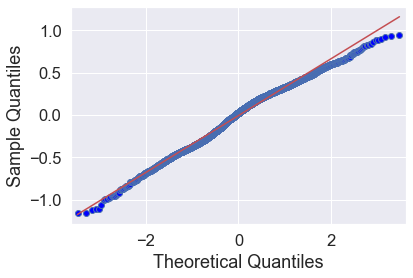

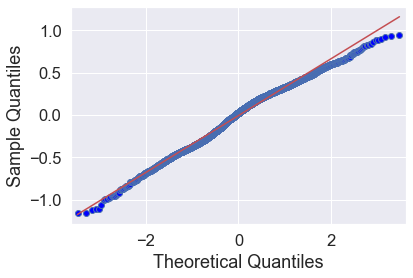

In [74]:
data = kc_log.copy()

y = data['logPrice']
X = data.drop(['logPrice'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

len(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

r2_score(y_test, y_hat_test)

residuals = (y_test - y_hat_test)

statsmodels.graphics.gofplots.qqplot(residuals, line = "r")